In [168]:
import csv
from datetime import datetime
import codecs
import pandas as pd
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import time
from sklearn.cluster import KMeans

In [257]:


with open('SubsForClustering.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    subs = pickle.load(f)
    
with open("sub_time_series.pickle","rb") as f:
    sent_time = pickle.load(f)
    
with open("subdict.pickle","rb") as f:
    subdict = pickle.load(f)
    

subs.remove('ivermectin')

In [258]:
dates = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
         '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
         '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
         '2021-07', '2021-08', '2021-09', '2021-10']

short_dates = ['2020-05', '2020-06',
         '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
         '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
         '2021-07', '2021-08', '2021-09']


In [259]:
#Run to remove repeat comments
for sub in fullsubs:
    include = True
    for date in short_dates:
        sents = sent_time[sub+date]
        c = Counter(sents)
        mc = c.most_common(5)
        top = mc[0][0]
        if top != 0:
            print(sub,date,c.most_common(3),mc[0][1]/len(sents))
            sent_time[sub+date] = [value for value in sents if value != top]
        #print(sub,date,c)

ama 2020-05 [(-0.1027, 210), (0.0, 88), (0.4019, 6)] 0.2770448548812665
ama 2020-06 [(-0.1027, 166), (0.0, 92), (-0.296, 8)] 0.23850574712643677
ama 2020-07 [(-0.1027, 246), (0.0, 131), (0.2732, 8)] 0.24453280318091453
ama 2020-08 [(-0.1027, 213), (0.0, 137), (-0.1531, 10)] 0.23002159827213822
ama 2020-09 [(-0.1027, 153), (0.0, 91), (0.3182, 5)] 0.21857142857142858
ama 2020-10 [(-0.1027, 169), (0.0, 100), (0.3612, 7)] 0.20634920634920634
ama 2020-11 [(-0.1027, 153), (0.0, 81), (0.3612, 9)] 0.19490445859872613
ama 2020-12 [(-0.1027, 217), (0.0, 102), (-0.296, 8)] 0.24031007751937986
ama 2021-01 [(-0.1027, 177), (0.0, 125), (0.4404, 8)] 0.19323144104803494
ama 2021-02 [(-0.1027, 95), (0.0, 69), (0.4019, 6)] 0.16047297297297297
ama 2021-03 [(-0.1027, 124), (0.0, 64), (-0.296, 7)] 0.2012987012987013
ama 2021-04 [(-0.1027, 118), (0.0, 80), (0.296, 5)] 0.1875993640699523
ama 2021-06 [(-0.1027, 65), (0.0, 48), (0.3612, 3)] 0.19174041297935104
ama 2021-07 [(-0.1027, 95), (0.0, 66), (0.4404, 6)

maryland 2020-05 [(0.5965, 481), (0.0, 54), (0.3182, 6)] 0.42082239720035
maryland 2020-06 [(0.5965, 358), (0.0, 35), (-0.7096, 5)] 0.5136298421807748
maryland 2020-07 [(0.5965, 415), (0.0, 69), (0.5574, 7)] 0.4287190082644628
maryland 2020-08 [(0.5965, 309), (0.0, 39), (0.2732, 4)] 0.4364406779661017
maryland 2020-09 [(0.5965, 300), (0.0, 32), (-0.34, 4)] 0.47393364928909953
maryland 2020-10 [(0.5965, 277), (0.0, 24), (-0.3818, 4)] 0.48853615520282184
maryland 2020-11 [(0.5965, 147), (0.9156, 67), (0.0, 60)] 0.16153846153846155
nostupidquestions 2021-01 [(0.7984, 590), (0.7037, 386), (0.0, 163)] 0.19211983067404753
nostupidquestions 2021-02 [(-0.3265, 623), (0.0, 136), (0.98, 98)] 0.2708695652173913
nostupidquestions 2021-03 [(-0.446, 568), (-0.3265, 202), (0.0, 159)] 0.23646960865945046
nostupidquestions 2021-04 [(-0.446, 792), (0.0, 186), (0.9714, 90)] 0.2768262845159035
nostupidquestions 2021-05 [(-0.446, 771), (0.0, 157), (0.9714, 62)] 0.30522565320665085
nostupidquestions 2021-06

In [295]:
features = []
fullsubs = []
for sub in subs:
    means = []
    variances = []
    LQs = []
    UQs = []
    medians = []
    include = True
    for date in short_dates:
        sents = sent_time[sub+date]
        if len(sents) <100:
            print(sub,date)
            include = False
        if sents == []:
            mean = 0.0
            var = 0.0
            prop = 0
        else:
            mean = np.mean(sents)
            var = np.var(sents)
            LQ = np.quantile(sents,0.25)
            median = np.quantile(sents,0.5)
            UQ = np.quantile(sents,0.75)
        means.append(mean)
        variances.append(var)
        LQs.append(LQ)
        UQs.append(UQ)
        
    if include:
        fullsubs.append(sub)
        norms = list(means-np.mean(means))
        timevar = np.var(means)
        feature = norms+means+variances+LQs+UQs+[timevar]
        #feature = [np.mean(means),np.var(means)]
        features.append(feature)



amcstock 2020-05
amcstock 2020-06
amcstock 2020-07
amcstock 2020-08
amcstock 2020-09
amcstock 2020-10
amcstock 2020-11
amcstock 2020-12
byebyejob 2020-05
byebyejob 2020-06
byebyejob 2020-07
byebyejob 2020-08
byebyejob 2020-09
byebyejob 2020-10
byebyejob 2021-03
collegebasketball 2020-05
collegebasketball 2020-09
collegebasketball 2020-10
collegebasketball 2021-06
collegebasketball 2021-09
covidlonghaulers 2020-05
covidlonghaulers 2020-06
covidlonghaulers 2020-07
covidvaccinated 2020-05
covidvaccinated 2020-06
covidvaccinated 2020-07
covidvaccinated 2020-08
covidvaccinated 2020-09
covidvaccinated 2020-10
covidvaccinated 2020-11
covidvaccinated 2020-12
cricket 2020-05
ddnews 2020-12
ddnews 2021-01
ddnews 2021-02
ddnews 2021-03
ddnews 2021-04
ddnews 2021-05
ddnews 2021-06
ddnews 2021-07
ddnews 2021-08
ddnews 2021-09
debatevaccines 2020-06
debatevaccines 2020-07
debatevaccines 2020-09
debatevaccines 2020-10
donaldtrump 2020-05
donaldtrump 2021-02
donaldtrump 2021-03
donaldtrump 2021-04
don

230
86
0.008270198978706273
[-0.42958578  0.59356242 -2.5980351  -0.09964344 -1.23325494 -0.03828417
  0.65244749  0.17863818 -0.82396806 -0.2996686   1.82676897 -1.081499
  2.18283248  0.74418788  1.33040658 -0.52097963 -0.07928664 -0.93976383
 -0.57397382 -1.56475328 -0.79766612 -1.11103509 -0.83636382 -0.67076758
 -0.79348215 -1.0154988  -0.8815887  -0.33243894 -1.17721222 -0.21170363
 -0.61919185 -0.43243921 -1.20363174 -1.02776901 -0.05989196  0.30967805
 -0.23626556 -0.17027674 -0.46822983  0.12749475 -0.14463653  0.29658731
  0.51264551  0.70092843  0.26348457  0.35345982 -0.18370194  1.26028301
  0.12596498  0.01903219  0.13158438 -0.78156464 -0.65960365 -1.25448476
 -0.64745131 -0.80716817 -0.78185906 -0.59708406 -0.82832069 -0.99829544
 -1.12737238 -0.3665243  -1.06475386 -0.18804549 -0.87461475 -0.51079378
 -1.04645087 -1.08613079 -0.88691819 -0.42942095 -1.83330487 -0.73968793
 -1.57219129 -0.90051144 -0.76126653 -0.77414383 -0.80960578 -0.75559916
 -0.24429813 -1.08584712 

(array([ 5., 24., 41., 46., 47., 29., 10., 10.,  9.,  9.]),
 array([-2.02505107, -1.5496053 , -1.07415953, -0.59871376, -0.12326799,
         0.35217778,  0.82762355,  1.30306932,  1.77851509,  2.25396086,
         2.72940663]),
 <BarContainer object of 10 artists>)

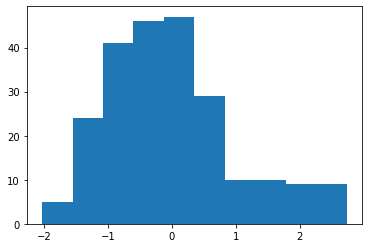

In [296]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print(len(fullsubs))
print(len(features[0]))
print(np.max([features[i][-1] for i in range(len(features))]))
print(X_scaled[0])
plt.hist([X_scaled[i][-2] for i in range(len(features))])

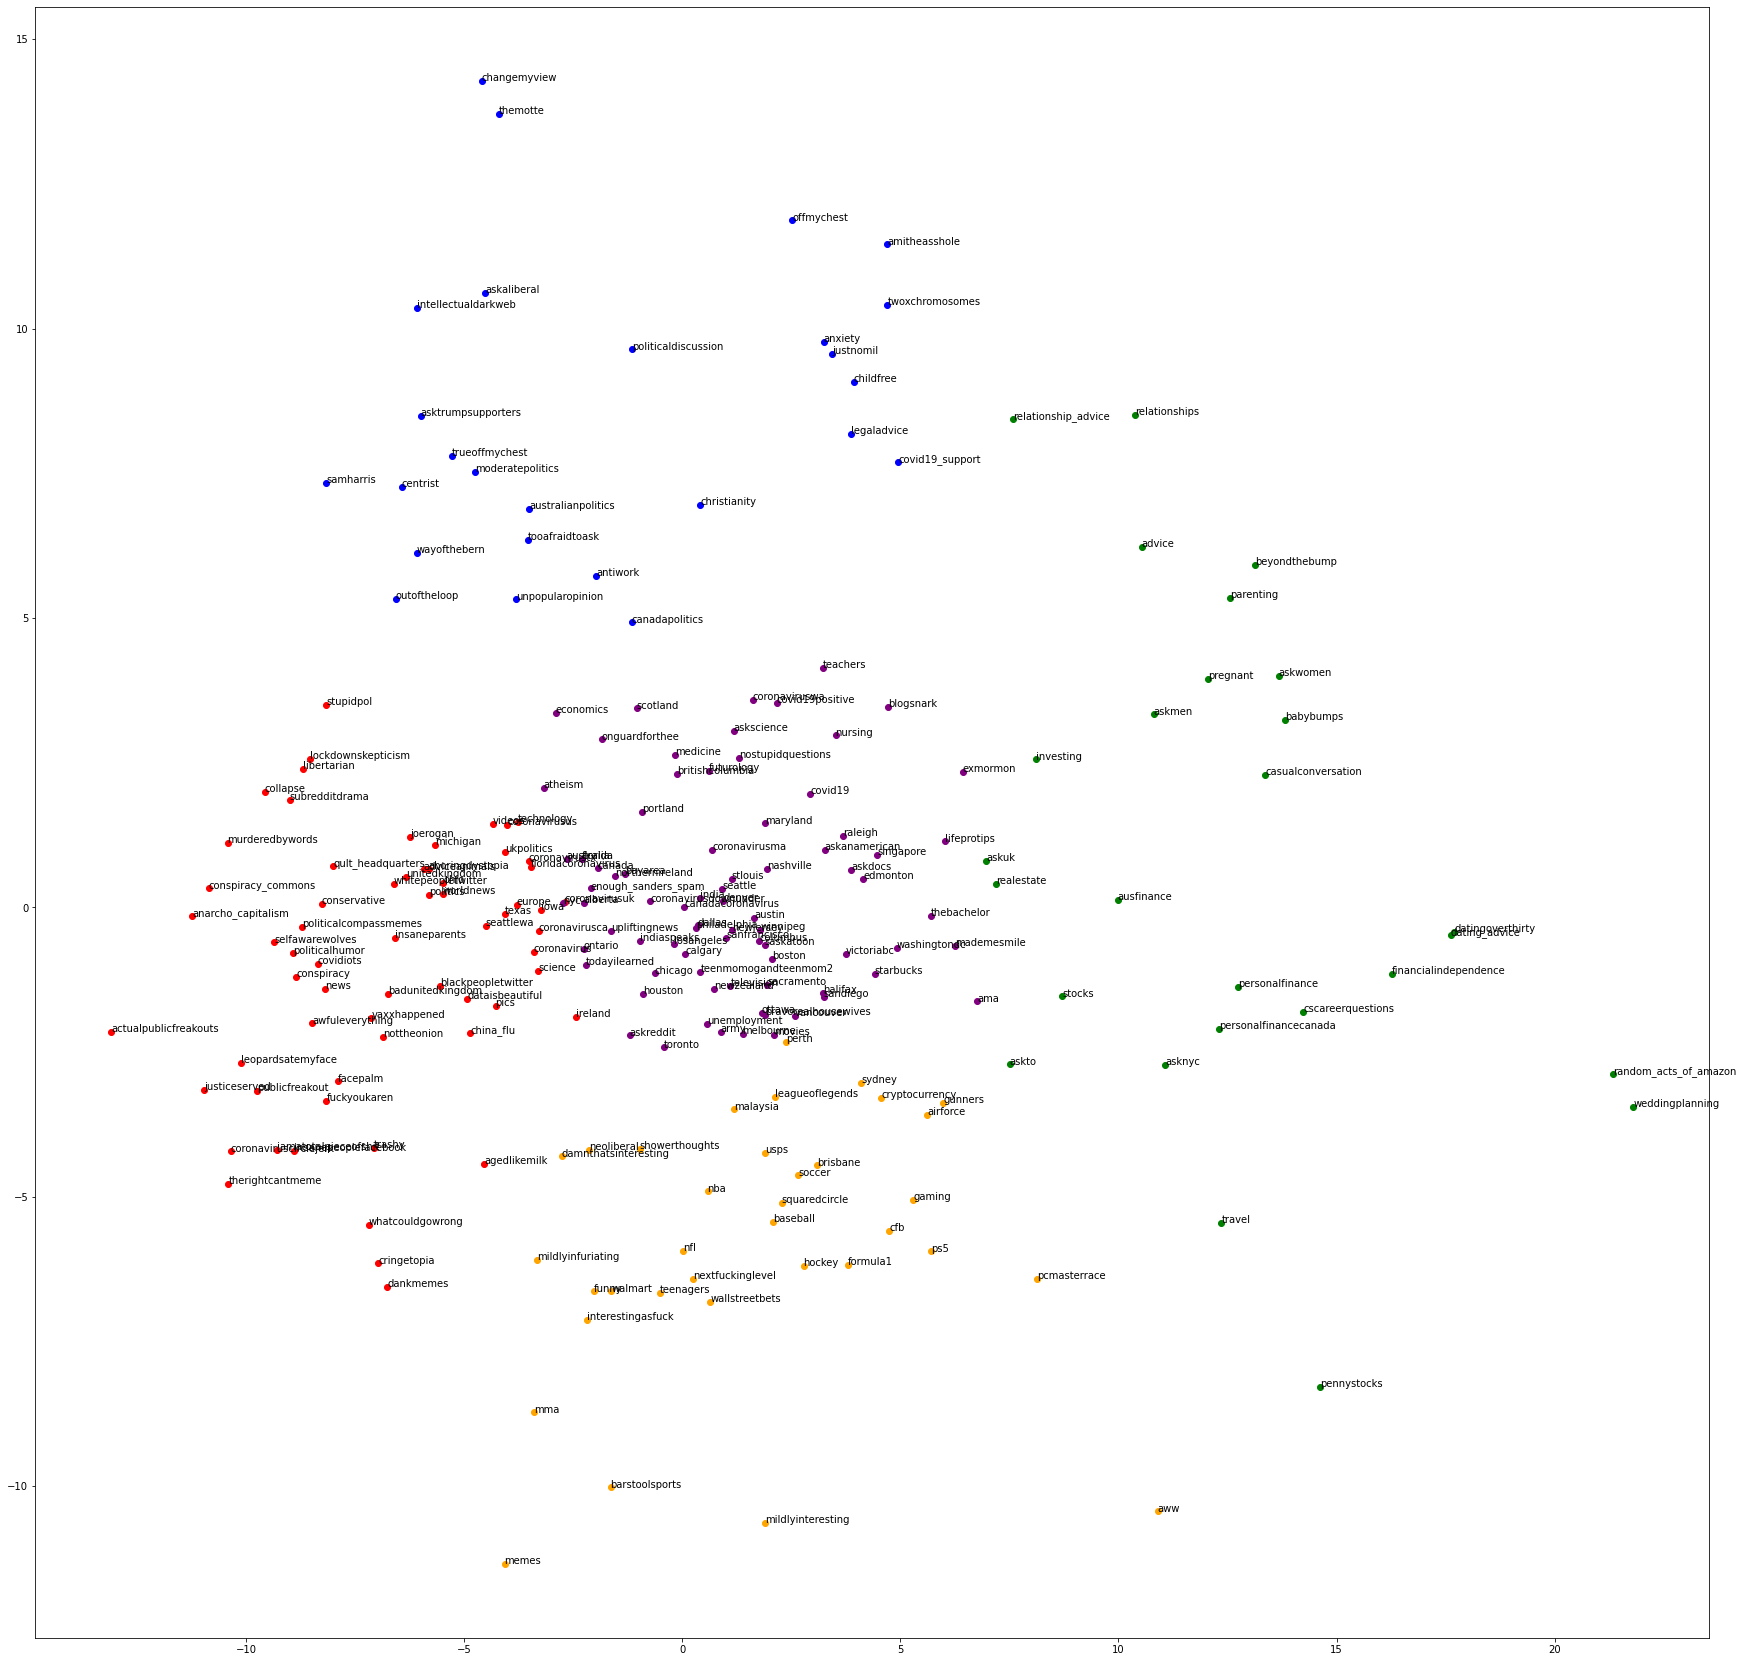

In [300]:
#Initialize the class object
clusters = 5
kmeans = KMeans(n_clusters= clusters)
 
#predict the labels of clusters.
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(30,30))
pca = PCA(n_components=2)
x_pca = pca.fit(X_scaled).transform(X_scaled)
x = [i[0] for i in x_pca]
y = [i[1] for i in x_pca]
cols = ["green","blue","orange","red","purple"]
for j in range(clusters):
    xcurr = [el for i,el in enumerate(x) if labels[i]==j]
    ycurr = [el for i,el in enumerate(y) if labels[i]==j]
    plt.scatter(xcurr,ycurr,label=subs,color=cols[j])
#plt.xlim(-10,17)
#plt.ylim(-7,10)
for i, txt in enumerate(fullsubs):
    label = txt #+' '+ [str(j)[2:4]for j in dat[i]][0] + [str(j)[2:4]for j in dat[i]][1] + [str(j)[2:4]for j in dat[i]][2]
    plt.annotate(label, (x[i], y[i]))

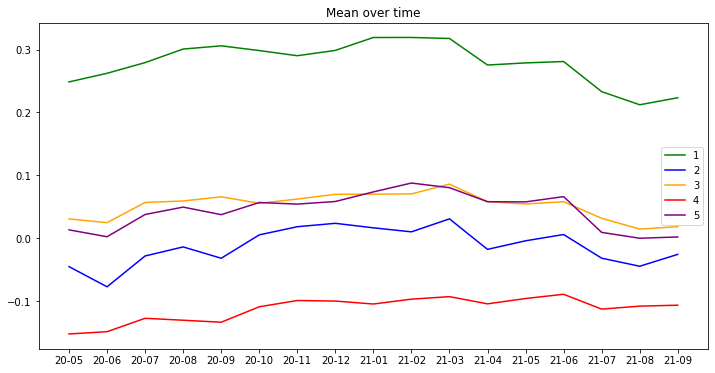

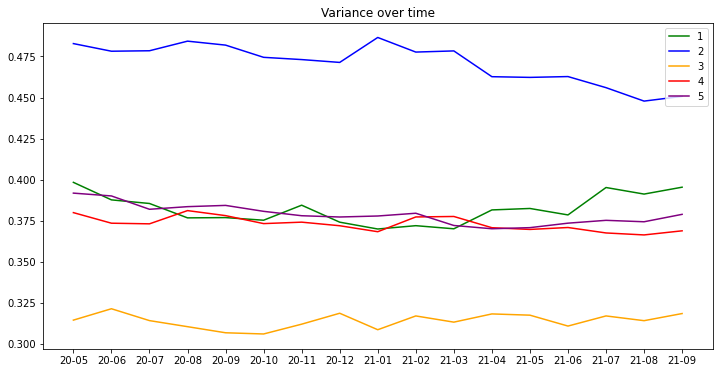

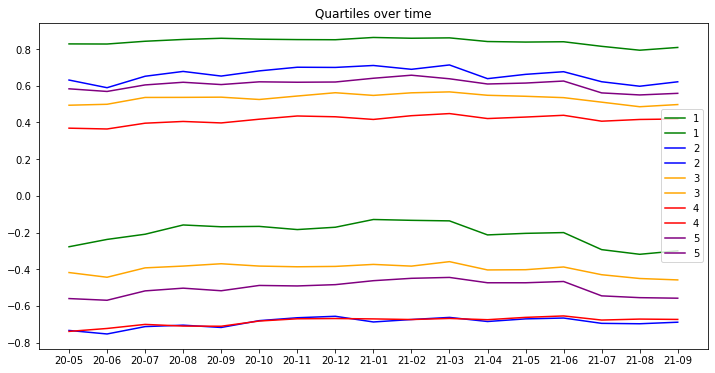

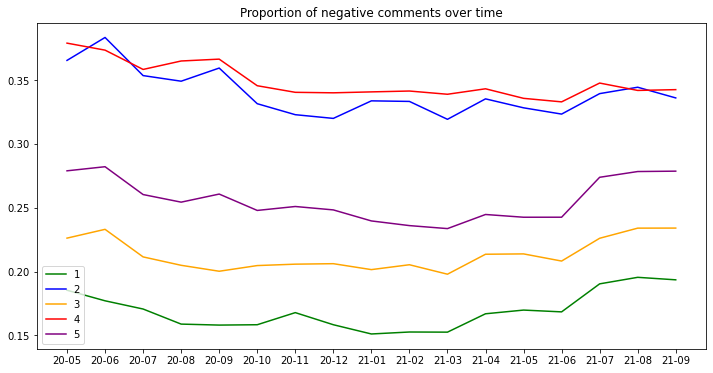

positive: 1 0.4761505220443399
negative: 1 0.16909697900684048
positive: 2 0.32456117418768465
negative: 2 0.3398544772589235
positive: 3 0.266260823514803
negative: 3 0.21331735087929263
positive: 4 0.2160279139877805
negative: 4 0.34896267955740046
positive: 5 0.30174049486821297
negative: 5 0.25605269711637746


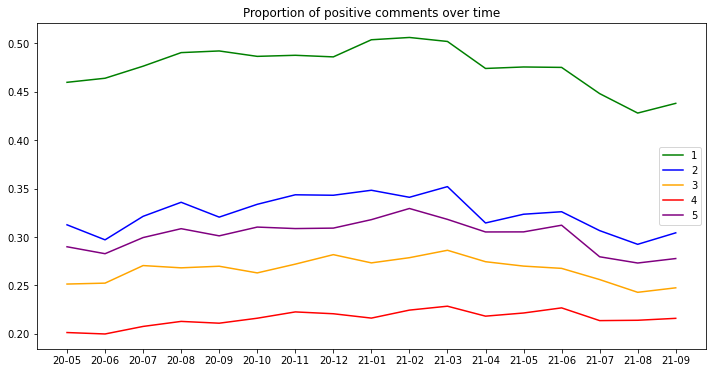

In [324]:
cols = ["green","blue","orange","red","purple"]
xs = [i[2:] for i in (short_dates)]
plt.figure(figsize=(12,6))
for j in range(clusters):
    ym = []
    print([fullsubs[i] for i,el in enumerate(labels) if el==j])
    for date in short_dates:
        xm = np.mean([np.mean(sent_time[fullsubs[i]+date]) for i,el in enumerate(labels) if el==j])
        ym.append(xm)
    
    plt.plot(xs,ym,label=j+1,color=cols[j])
plt.title("Mean over time")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for j in range(clusters):
    yv = []
    for date in short_dates:
        xv = np.mean([np.var(sent_time[fullsubs[i]+date]) for i,el in enumerate(labels) if el==j])
        yv.append(xv)
    
    plt.plot(xs,yv,label=j+1,color=cols[j])
plt.title("Variance over time")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for j in range(clusters):
    yuq = []
    ylq = []
    for date in short_dates:
        xuq = np.mean([np.quantile(sent_time[fullsubs[i]+date],0.75) for i,el in enumerate(labels) if el==j])
        xlq = np.mean([np.quantile(sent_time[fullsubs[i]+date],0.25) for i,el in enumerate(labels) if el==j])
        #print(j,date,xm)
        yuq.append(xuq)
        ylq.append(xlq)
        
    plt.plot(xs,yuq,label=j+1,color=cols[j])
    plt.plot(xs,ylq,label=j+1,color=cols[j])
plt.title("Quartiles over time")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
posses = []
negses = []
for j in range(clusters):
    poss = []
    negs = []
    for date in short_dates:
        pos = np.mean([np.mean(np.array(sent_time[fullsubs[i]+date])>0.5) for i,el in enumerate(labels) if el==j])
        neg = np.mean([np.mean(np.array(sent_time[fullsubs[i]+date])<-0.5) for i,el in enumerate(labels) if el==j])
        #print(j,date,xm)
        poss.append(pos)
        negs.append(neg)
    posses.append(poss)
    negses.append(negs)
    plt.plot(xs,negs,label=j+1,color=cols[j])
plt.title("Proportion of negative comments over time")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for j in range(clusters):
    print("positive:",j+1,np.mean(posses[j]))
    print("negative:",j+1,np.mean(negses[j]))
    plt.plot(xs,posses[j],label=j+1,color=cols[j])
plt.title("Proportion of positive comments over time")
plt.legend()
plt.show()
    
    

# The Five Clusters

When discussing Covid, 5 broad categories of subreddit emerge:

### 1. Positive Non-political (green)
Covid is not the main focus of these subreddits, but occasional Covid discussion takes place if it is related. They are not political and generally relate to society or finance. Discussion around Covid is relatively positive, with few negative comments.

**Size: 27**

**Percentage positive (>0.5) comments: 47.6%**

**Percentage negative (<0.5) comments: 16.9%**

**Examples:** parenting, pregnant, relationships, realestate, stocks, financialindependence, travel, dating_advice, casualconversation

### 2. Debate (blue)
These subreddits tend to be based around political debate. Sentiment is lower than average because people often disagree, and the variance is high as mutliple viewpoints are expressed. Some subreddits in this group are not explicitly designed around debate, but are in this category due to their controversial nature.

**Size:26**

**Percentage positive (>0.5) comments: 32.4%**

**Percentage negative (<0.5) comments: 33.9%**

**Examples of debate subreddits:** askaliberal, asktrumpsupporters, legaladvice, politicaldiscussion, unpopularopinion, tooafraidtoask, australianpolitics, canadianpolitics, changemyview

**Examples of 'unintentional' debate subreddits:** antiwork, anxiety, wayofthebern, childfree, christianity

### 3. Hobbies (orange)

Conversations in these subreddits generally concerns some hobby or interest, like a sport or videogame. Disussion around covid is broadly neutral, and both positive and negative comments are uncommon. A few of the subreddits in this category are cities, but only cities that were mostly unaffected by covid, especially in Australia.

**Size:35**

**Percentage positive (>0.5) comments: 26.6%**

**Percentage negative (<0.5) comments: 21.3%**

**Examples include:** formula1, baseball, leagueoflegends, gaming, hockey, ps5, soccer, mma, funny, airforce, memes, sydney, perth, brisbane

### 4. Political echochambers/Covid specific (red)

These subreddits have far more negative comments than positive when discussing Covid. They are broadly political in nature, and partisan. Both 'right' and 'left' subreddits fall into this category, as well as subreddits that focus on mocking/belittling opponents. Subreddits that are focused on Covid are also in this category. Little debate takes place, and so the variance of sentiment is small. Some ostensibly large non-political subreddits are also in this category, reflecting their increased politicisation.

**Size:64**

**Percentage positive (>0.5) comments: 21.6%**

**Percentage negative (<0.5) comments: 34.8%**

**Explicitly political:** anarcho_capitalism, conservative, news, politicalcompassmemes, politics, politicalhumor, libertarian, ukpolitics, worldnews

**Coronavirus themed:** coronavirus, coronavirusca, coronaviruscirclejerk, coronavirustx, coronavirusuk, coronavirusus, floridacoronavirus

**Making fun of people:** agedlikemilk, awfuleverything, badunitedkingdomn, blackpeopletwitter, covidiots, cringetopia, facepalm, fuckyoukaren, iamatotalpieceofshit, insaneparents, insanepeoplefacebook, justiceserved, leopardsatemyface, murderedbywords, publicfreakout, qult_headquarters, selfawarewolves, stupidpol, subredditdrama, therightcantmeme, trashy, vaxxhappened, whatcouldgowrong, whitepeopletwitter

**Large 'neutral' subreddits:** adviceanimals, dankmemes, dataisbeautiful, pics, science, technology, videos

**Geographically themed:** europe, iowa, ireland, michigan, ohio, seattlewa, texas, unitedkingdom

**Conspiratorial:** conspiracy, conspiracy_commons, lockdownskepticism

### 5. Everything else (Mostly Geographic) (purple)

These subreddits are mostly geographic, and thus feature a varied sentiment and haven't become overt echochambers. Sentiment is generally mild, but not as uniformly mild as category 3. Many 'askreddit' style subreddits appear in this category, because occasionally they will have fierce debate, but mostly covid will be a topic brought up while discussing something else.

**Size:78**

**Percentage positive (>0.5) comments: 30.1%**

**Percentage negative (<0.5) comments: 25.6%**


**Geographic examples (43/78):** alberta, austin, australia, bayarea, boston, britishcolumbia, calgary, canada, chicago, columbus, dallas, denver, edmonton, florida, halifax, houston, india, losangeles, maryland, melbourne, nashville, newjersey, newzealand, northernireland, nyc, ontaria, ottawa, philadelphia, portland, raleigh, sacramento, sandiego, sanfrancisco, saskatoon, scotland, seattle, singapore, stlouis, toronto, vancouver, victoriabc, washingtondc, winnipeg

**'Askreddit' style:** ama, askanamerican, askreddit, askscience, nostupidquestions

**Other:** army, atheism, medicine, movies, nursing, starbucks, teachers, telivision, todayilearned, unemployment


In [330]:
len(fullsubs)
for j in range(clusters):
    sublist = [fullsubs[i] for i,el in enumerate(labels) if el==j]
    print(len(sublist),sublist)

27 ['advice', 'askmen', 'asknyc', 'askto', 'askuk', 'askwomen', 'ausfinance', 'babybumps', 'beyondthebump', 'casualconversation', 'cscareerquestions', 'dating_advice', 'datingoverthirty', 'financialindependence', 'investing', 'parenting', 'pennystocks', 'personalfinance', 'personalfinancecanada', 'pregnant', 'random_acts_of_amazon', 'realestate', 'relationship_advice', 'relationships', 'stocks', 'travel', 'weddingplanning']
26 ['amitheasshole', 'antiwork', 'anxiety', 'askaliberal', 'asktrumpsupporters', 'australianpolitics', 'canadapolitics', 'centrist', 'changemyview', 'childfree', 'christianity', 'covid19_support', 'intellectualdarkweb', 'justnomil', 'legaladvice', 'moderatepolitics', 'offmychest', 'outoftheloop', 'politicaldiscussion', 'samharris', 'themotte', 'tooafraidtoask', 'trueoffmychest', 'twoxchromosomes', 'unpopularopinion', 'wayofthebern']
35 ['airforce', 'aww', 'barstoolsports', 'baseball', 'brisbane', 'cfb', 'cryptocurrency', 'damnthatsinteresting', 'formula1', 'funny', 

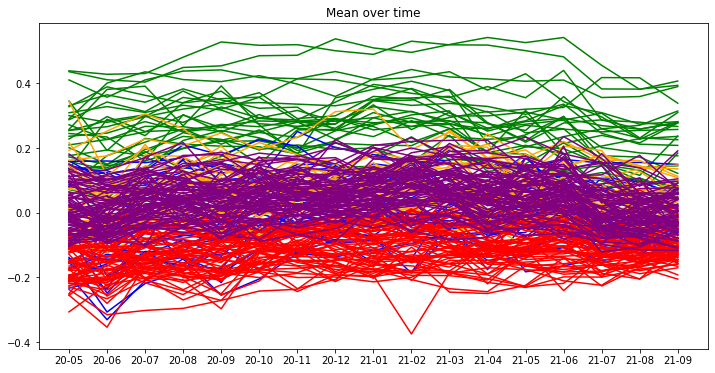

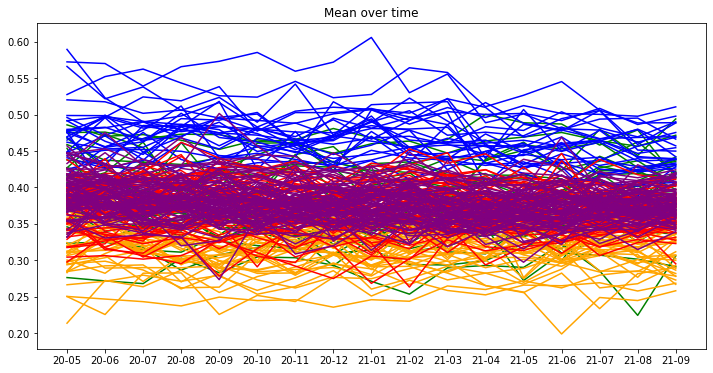

In [340]:
cols = ["green","blue","orange","red","purple"]
xs = [i[2:] for i in (short_dates)]
plt.figure(figsize=(12,6))
for j in range(clusters):
    current = [fullsubs[i] for i,el in enumerate(labels) if el==j]
    for sub in current:
        xm = []
        ym = []
        for date in short_dates:
            xm = np.mean(sent_time[sub+date])
            ym.append(xm)
    
        plt.plot(xs,ym,color=cols[j])
    plt.title("Mean over time")
plt.show()   
    
plt.figure(figsize=(12,6))
for j in range(clusters):
    current = [fullsubs[i] for i,el in enumerate(labels) if el==j]
    for sub in current:
        xm = []
        ym = []
        for date in short_dates:
            xm = np.var(sent_time[sub+date])
            ym.append(xm)
    
        plt.plot(xs,ym,color=cols[j])
    plt.title("Mean over time")
plt.show()

[]

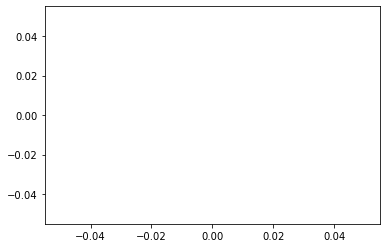

In [337]:
plt.plot()